In this step exploratory data analysis is performed on the dataset. The dataset is loaded and explored to get a better understanding of the data. Possible data types are noted and data is split into train and test set.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv file
df = pd.read_csv('../dataset/customer_churn.csv')

In [5]:
X_test = df.drop("Churn", axis=1)
X_test.to_csv('test2.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It can be observed that TotalCharges is an object type column. This is because it contains some empty values. These empty values must be replaced with NaN values. The column is then converted to float type.

In [5]:
pd.to_numeric(df.TotalCharges, errors="coerce").isnull()
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
# remove rows with no TotalCharges
df = df[df.TotalCharges != " "]

In [7]:
df.TotalCharges = df.TotalCharges.astype(float)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# explore the object type columns
def print_unique_col_values_counts (df):
    for column in df:
        if df[column].dtypes=="object":
            print(f'{column}: {df[column].unique()}')

In [11]:
print_unique_col_values_counts(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [12]:
# replace values
df.replace("No internet service", "No", inplace=True)
df.replace("No phone service", "No", inplace=True)

In [13]:
# from sdv.metadata import SingleTableMetadata

# metadata = SingleTableMetadata()

In [14]:
# metadata.detect_from_dataframe(data=df)

In [15]:
# metadata

In [16]:
# metadata.update_column(
#     column_name='customerID',
#     sdtype='id',
#     regex_format='[0-9]{4}_[A-Z]{5}'
# )
# metadata.update_column(
#     column_name='SeniorCitizen',
#     sdtype='categorical')


In [17]:
# metadata.set_primary_key(column_name='customerID')

In [18]:
# metadata

In [19]:
# df_1 = df.iloc[:100,:]
# df_2 = df.iloc[100:,:]
# print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))

In [20]:
# from sdv.single_table import CopulaGANSynthesizer

# synthesizer = CopulaGANSynthesizer(metadata)
# synthesizer.fit(df_1)



In [21]:
# synthetic_data = synthesizer.sample(num_rows=10000)

In [22]:
# synthetic_data.head()

In [23]:
# # summarize the numerical columns
# df.describe()

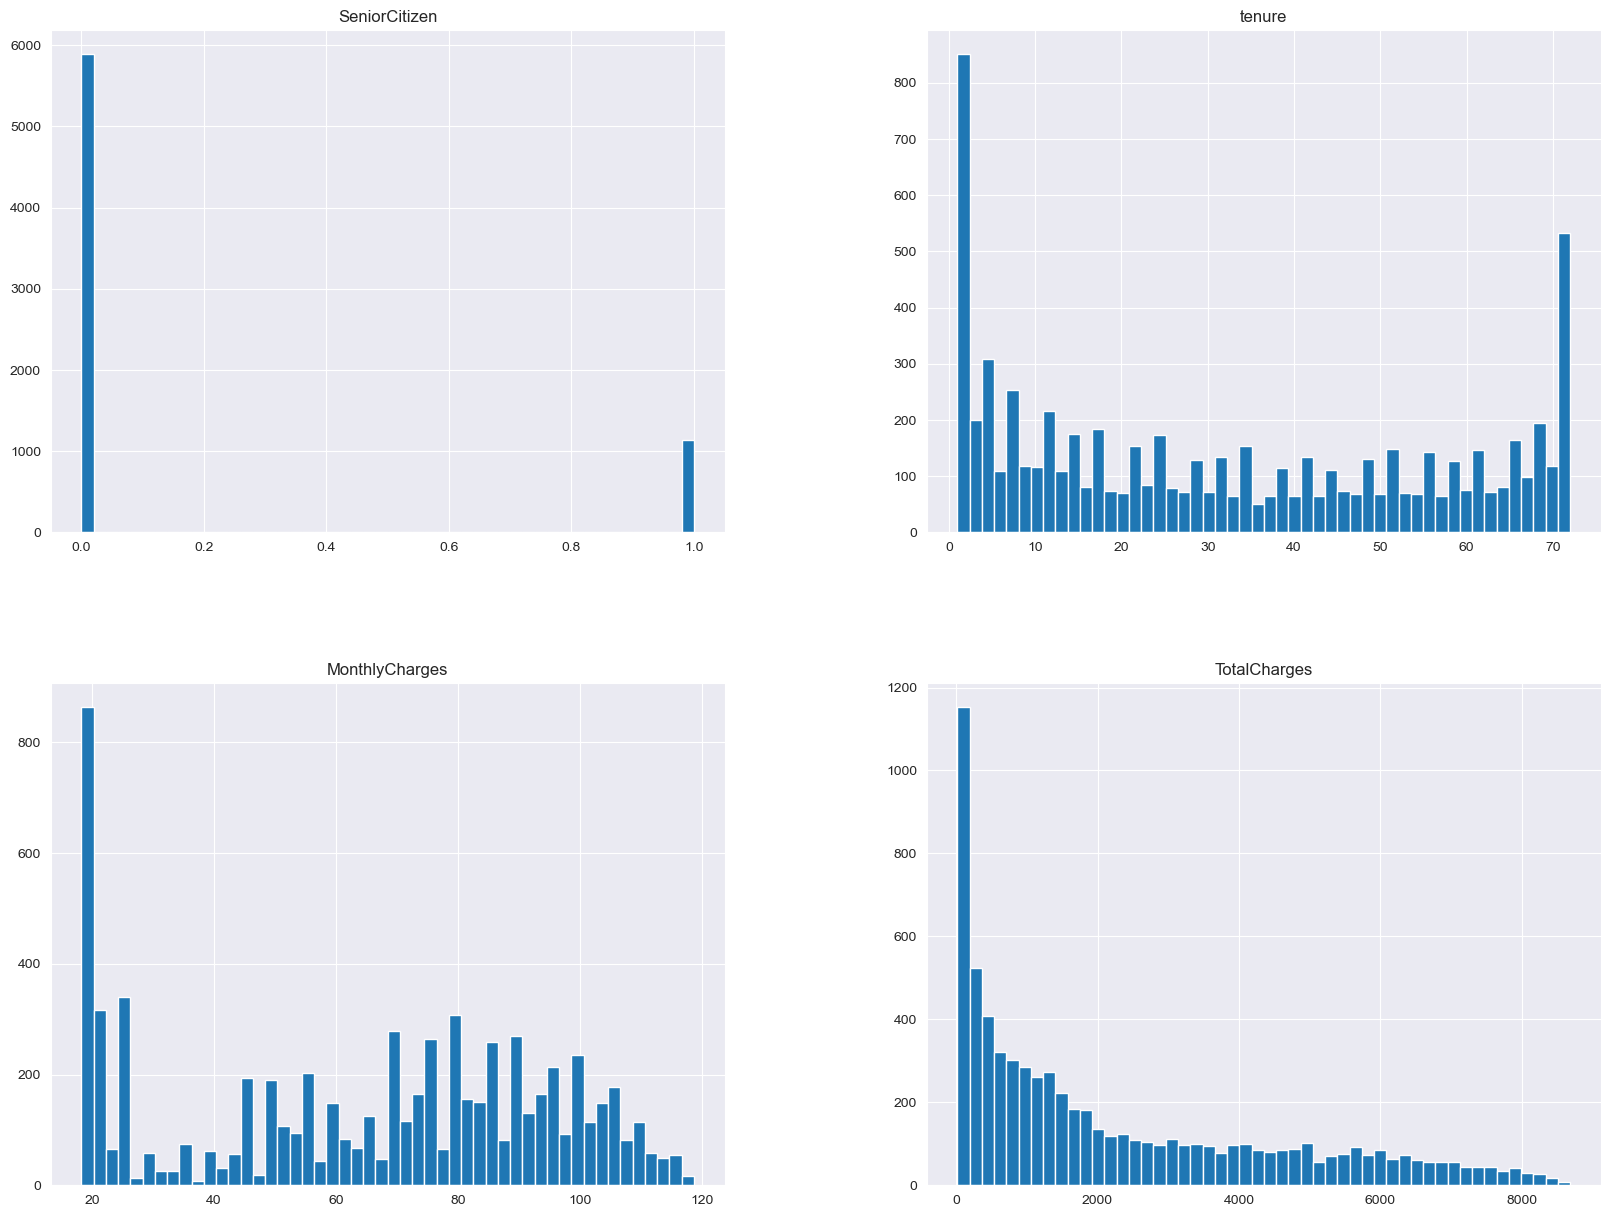

In [24]:
# only in a Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
print_unique_col_values_counts(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Columns with yes/no values can be mapped to have 1s and 0s. This will make it easier to work with the data.

In [26]:
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [27]:
# The customerID column is not useful as the feature is used for identification of customers.
df.drop(["customerID"],axis=1,inplace = True)

In [28]:
# Encode categorical features
binary_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in binary_columns:
    df[col].replace({"Yes":1, "No":0}, inplace=True)

In [29]:
print_unique_col_values_counts(df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
df["gender"].replace({"Female":1, "Male":0}, inplace=True)

In [31]:
# perform one hot encoding on the categorical columns
# Get dummy data for some of the categorical data
df = pd.get_dummies(data = df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [32]:
df.shape

(7032, 27)

In [33]:
# create a copy of the dataframe
df_copy = df.copy()
X = df_copy.drop("Churn", axis=1)
y = df_copy["Churn"]

In [34]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [35]:
X.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.008883,0.016328,0.013093,0.000807,...,-0.007584,0.011189,-0.004745,0.003251,-0.007755,0.003603,0.015973,-0.001632,-0.000844,-0.013199
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


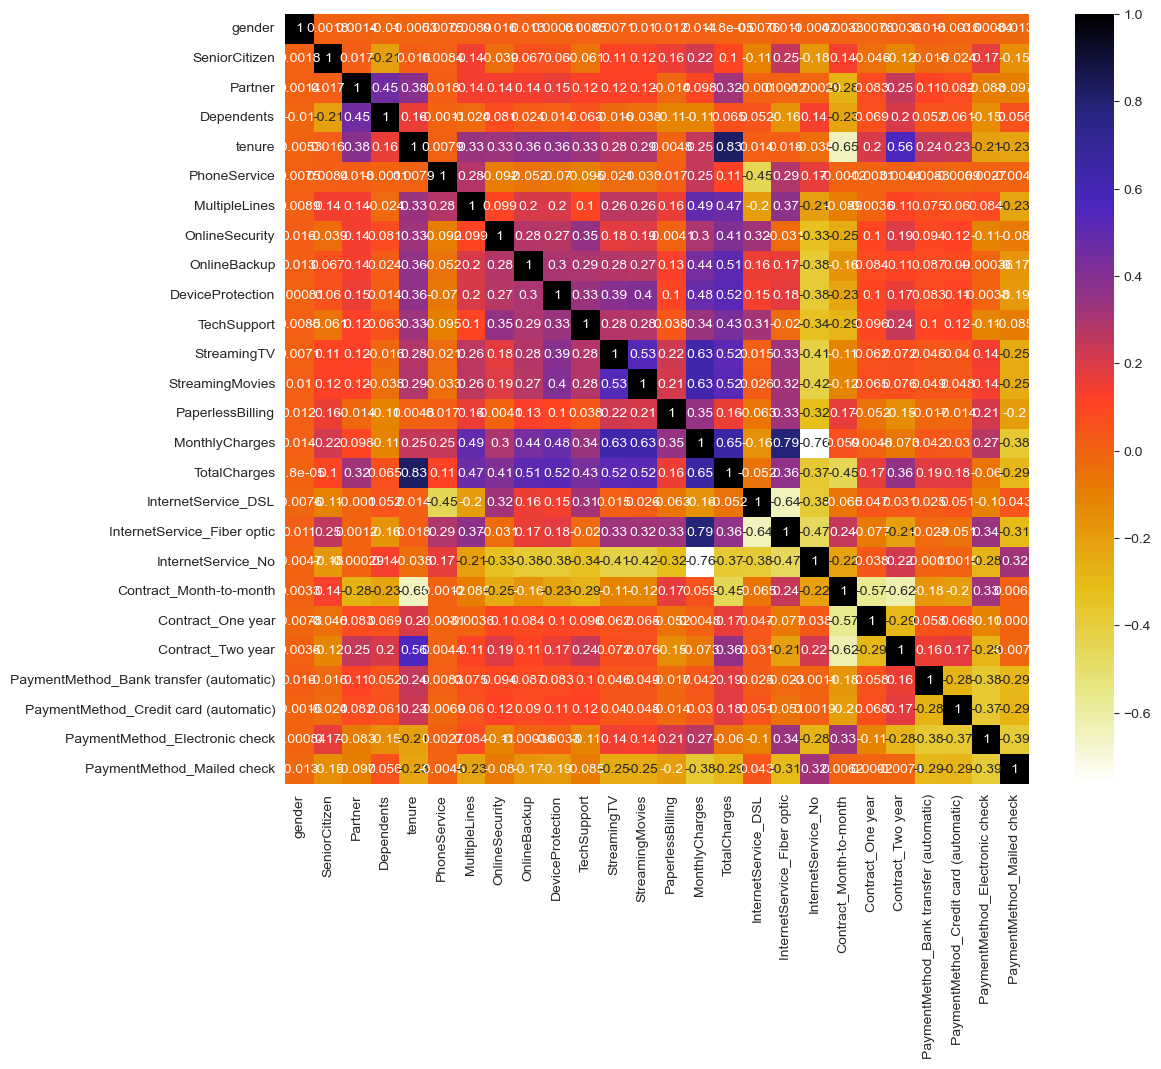

In [36]:
# corr_matrix["Churn"].sort_values(ascending=False)
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [37]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

1

In [39]:
# the below are the columns that are highly correlated and can be removed
corr_features

{'TotalCharges'}

In [40]:
df = df.drop(corr_features, axis=1)

In [41]:
cols_to_scale = ["tenure", "MonthlyCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [42]:
for column in df:
    print(f'{column}: {df[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [43]:
# df = synthetic_data

In [44]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [45]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [46]:
# split the data and handle the imbalances in only the training data
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into training and test sets
X, X_test2, y, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SMOTE algorithm
smote = SMOTE(random_state=42)

# Apply SMOTE to only the training set
X, y = smote.fit_resample(X, y)


In [47]:
# Instantiate the SMOTE algorithm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to only the training set
X_resampled, y_resampled = smote.fit_resample(X, y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
# Split the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [50]:
# check the distribution of the target variable in the resampled data
y_train.value_counts()

0    3308
1    3300
Name: Churn, dtype: int64

In [51]:
# create a baseline rf model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = rf.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- TotalCharges


In [ ]:
#helper function to print classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score, f1_score,accuracy_score,roc_curve

clf_name = []
roc_auc = []
f1 = []
def model_eval(clf, y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='cividis')
    m1 = roc_auc_score(y_test, y_pred)
    m2 = f1_score(y_test, y_pred)
    print('ROC_AUC_Score: {:.04f}'.format(m1))
    print('F1 Score: {:.04f}'.format(m2))
    clf_name.append(clf)
    roc_auc.append(m1)
    f1.append(m2)

In [53]:
model_eval("Random Forest", y_test, y_pred)

NameError: name 'model_eval' is not defined

In [54]:
X = X.to_numpy()
y = y.to_numpy()

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of folds for cross validation
k_folds = 5

# Initialize a random forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# Initialize a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize a list to store accuracy scores for each fold
accuracy_scores = []

# Perform k-fold cross validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    # Split the data into training and testing sets for the current fold
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Fit the random forest classifier to the training data
    rfc.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = rfc.predict(X_test)
    
    # Calculate accuracy score for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Print the accuracy score for the current fold
    print(f'Fold {fold+1} accuracy score: {accuracy:.4f}')

# Print the average accuracy score across all folds
print(f'Average accuracy score: {np.mean(accuracy_scores):.4f}')


Fold 1 accuracy score: 0.8432
Fold 2 accuracy score: 0.8384
Fold 3 accuracy score: 0.8402
Fold 4 accuracy score: 0.8523
Fold 5 accuracy score: 0.8535
Average accuracy score: 0.8455


In [56]:
y_pred = rfc.predict(X_test2)
print(accuracy_score(y_test2, y_pred))
print(f1_score(y_test2, y_pred))


0.7533759772565742


C:\Users\Apiseg\anaconda3\envs\churn\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


NameError: name 'f1_score' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
#Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Fit the optimized model to the data
rf_opt = RandomForestClassifier(**best_params).fit(X_train, y_train)

y_pred = rf_opt.predict(X_test)
clf = "Random Forest"
model_eval(clf,y_test, y_pred)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
clf = "KNN"
model_eval(clf,y_test, y_pred)

NameError: name 'model_eval' is not defined

In [58]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# svm = svm.SVC().fit(X_train, y_train)
# model_eval(svm,y_test, y_pred)
svm2 = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf', 'linear']
},cv=3, return_train_score=False)

svm2.fit(X_train, y_train)
y_pred = svm2.predict(X_test)
clf = "SVM"
model_eval(svm2,y_test, y_pred)

NameError: name 'model_eval' is not defined

In [71]:
import xgboost as xgb
gbm = xgb.XGBClassifier().fit(X_train,y_train)
y_pred = gbm.predict(X_test)
clf = "XGBoost"
model_eval(clf,y_test, y_pred)

NameError: name 'model_eval' is not defined

In [59]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
clf = "Logistic Regression"
model_eval(clf,y_test, y_pred)

NameError: name 'model_eval' is not defined

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [61]:
X_train.shape

(6608, 25)

In [62]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# Define the model in a function
def create_model(num_filters, kernel_size, pool_size, fc1_units, fc2_units):
    input_layer = Input(shape=(25, 1))
    conv_layer = Conv1D(num_filters, kernel_size, activation='relu')(input_layer)
    max_pooling_layer = MaxPooling1D(pool_size=pool_size)(conv_layer)
    flatten_layer = Flatten()(max_pooling_layer)
    dropout_layer = Dropout(rate=0.5)(flatten_layer)
    fc1 = Dense(fc1_units, activation='relu')(dropout_layer)
    fc2 = Dense(fc2_units, activation='relu')(fc1)
    output_layer = Dense(1, activation='sigmoid')(fc2)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [63]:
model = create_model(512, 2, 2, 2048, 1024)

In [64]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 24, 512)           1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 512)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 dropout (Dropout)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 2048)              12584960  
                                                             

In [65]:
import matplotlib.pyplot as plt
def plot_val_acc_loss(history):     
    #plot the training and validation accuracy and loss at each epoch     
    loss = history.history['loss']     
    val_loss = history.history['val_loss']     
    epochs = range(1, len(loss) + 1)     
    plt.plot(epochs, loss, 'y', label='Training loss')     
    plt.plot(epochs, val_loss, 'r', label='Validation loss')     
    plt.title('Training and validation loss')     
    plt.xlabel('Epochs')     
    plt.ylabel('Loss')     
    plt.legend()     
    plt.show()     
    acc = history.history['accuracy']     
    val_acc = history.history['val_accuracy']     
    plt.plot(epochs, acc, 'y', label='Training acc')     
    plt.plot(epochs, val_acc, 'r', label='Validation acc')     
    plt.title('Training and validation accuracy')     
    plt.xlabel('Epochs')     
    plt.ylabel('Accuracy')     
    plt.legend()     
    plt.show()

In [66]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128,validation_data=(X_val, y_val))

Epoch 1/30
52/52 [==============================] - 4s 15ms/step - loss: 0.5139 - accuracy: 0.7393 - val_loss: 0.4435 - val_accuracy: 0.7912
Epoch 2/30
52/52 [==============================] - 0s 9ms/step - loss: 0.4689 - accuracy: 0.7766 - val_loss: 0.4341 - val_accuracy: 0.8051
Epoch 3/30
52/52 [==============================] - 0s 9ms/step - loss: 0.4709 - accuracy: 0.7772 - val_loss: 0.4578 - val_accuracy: 0.7881
Epoch 4/30
52/52 [==============================] - 1s 10ms/step - loss: 0.4609 - accuracy: 0.7807 - val_loss: 0.4326 - val_accuracy: 0.8051
Epoch 5/30
52/52 [==============================] - 1s 10ms/step - loss: 0.4539 - accuracy: 0.7842 - val_loss: 0.4204 - val_accuracy: 0.8015
Epoch 6/30
52/52 [==============================] - 0s 10ms/step - loss: 0.4521 - accuracy: 0.7880 - val_loss: 0.4142 - val_accuracy: 0.8105
Epoch 7/30
52/52 [==============================] - 0s 9ms/step - loss: 0.4470 - accuracy: 0.7886 - val_loss: 0.4168 - val_accuracy: 0.8033
Epoch 8/30
52/52

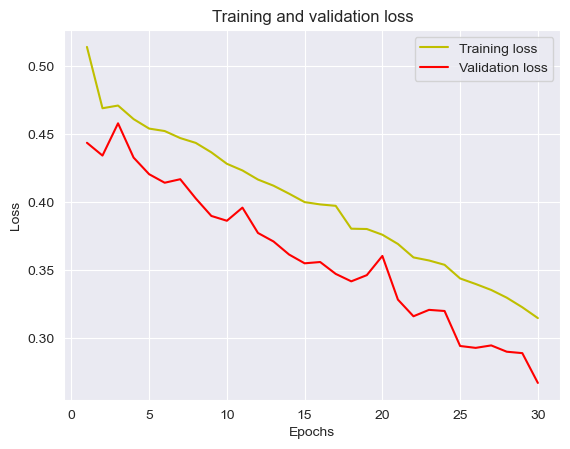

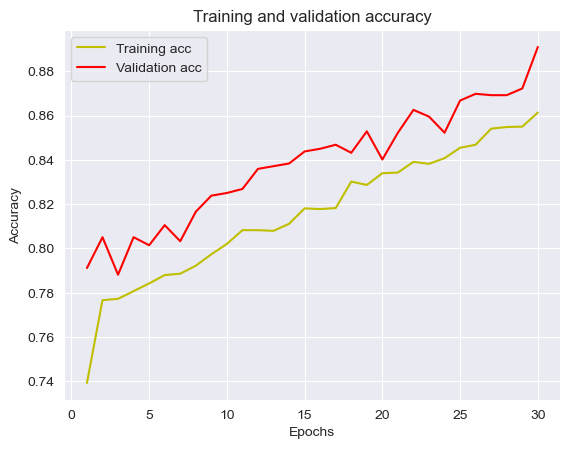

In [67]:
plot_val_acc_loss(history)

In [68]:
model.evaluate(X_test, y_test)
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

52/52 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       835
           1       0.77      0.89      0.82       817

    accuracy                           0.81      1652
   macro avg       0.82      0.81      0.81      1652
weighted avg       0.82      0.81      0.81      1652



In [72]:
# Get the predictions from the DNN model
cnn_predictions = model.predict(X_test)
cnn_predictions = [round(x[0]) for x in cnn_predictions]

# Get the predictions from the other models
# rf_predictions = rf_opt.predict(X_test)
knn_predictions = knn.predict(X_test)
svm_predictions = svm2.predict(X_test)
xgb_predictions = gbm.predict(X_test)
lr_predictions = log.predict(X_test)

52/52 [==============================] - 0s 7ms/step


In [73]:
# Combine the predictions into a new dataframe
predictions = np.column_stack((cnn_predictions, knn_predictions,   svm_predictions, xgb_predictions, lr_predictions))

# Define the meta model
meta_model = LogisticRegression()

# Fit the meta model
meta_model.fit(predictions, y_test)

# Get the final predictions from the meta model
final_predictions = meta_model.predict(predictions)

# Calculate the accuracy of the stacking classifier
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy of the stacking classifier:", accuracy)

Accuracy of the stacking classifier: 0.8353510895883777


In [74]:
final_predictions

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
type(final_predictions)

numpy.ndarray

In [77]:
type(X_test)

numpy.ndarray

In [59]:

f1_score = f1_score(y_test, final_predictions)
print("F1 score of the stacking classifier:", f1_score)

F1 score of the stacking classifier: 0.8527493010251631


In [60]:
roc_auc_score = roc_auc_score(y_test, final_predictions)
print("roc_auc_score of the stacking classifier:", roc_auc_score)

roc_auc_score of the stacking classifier: 0.8472100784107555


              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1037
           1       0.82      0.89      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



TypeError: 'numpy.float64' object is not callable

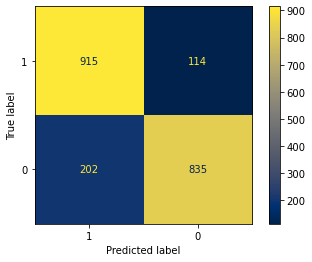

In [61]:
model_eval(meta_model,y_test, final_predictions)